**Assignment on Classification**

Do the following in the iris dataset
1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)

Import necessary libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Q1.Read the iris data

In [169]:
data=pd.read_excel('/content/iris (1).xls')

In [170]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [171]:
data.shape

(150, 5)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Q2.**Preprocessing**

Handling Missing Values

In [173]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Lets plot a frequency graph

In [174]:
freq_graph=data.select_dtypes(include='float')

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

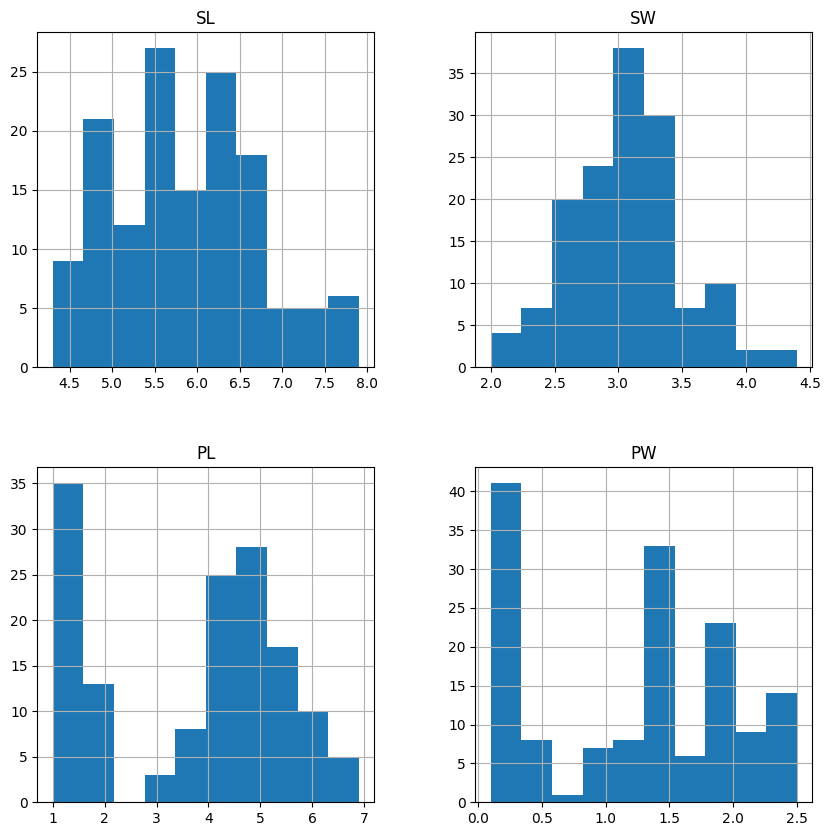

In [175]:
freq_graph.hist(figsize=[10,10])

In [176]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [177]:
for i in ['SL', 'SW', 'PL']:
  data[i]=data[i].fillna(data[i].median())

In [178]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Managing Outliers

Text(0.5, 1.0, 'Boxplot for SL')

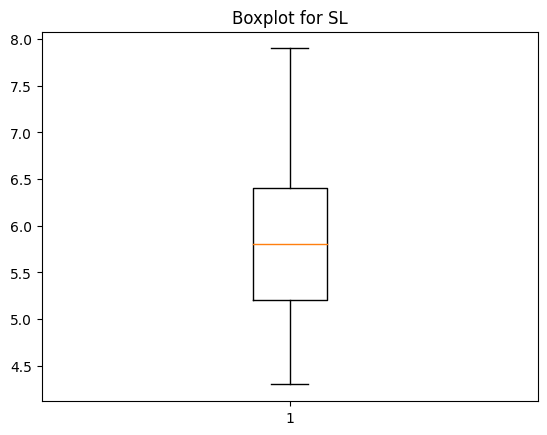

In [179]:
plt.boxplot(data['SL'])
plt.title('Boxplot for SL')

Text(0.5, 1.0, 'Boxplot for SW')

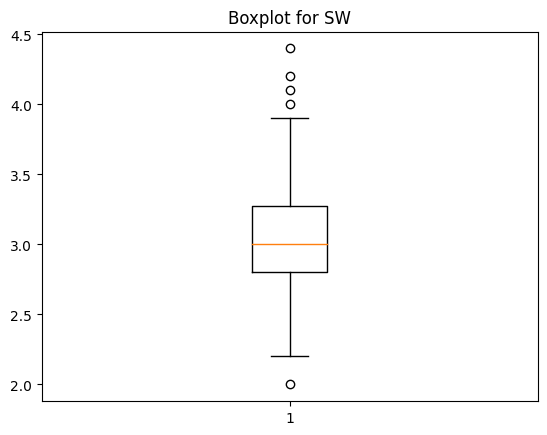

In [180]:
plt.boxplot(data['SW'])
plt.title('Boxplot for SW')

from graph we can see outliers are present.so we have to manage these outliers.

First we find IQR.

In [181]:
Q1=np.percentile(data['SW'],25)

In [182]:
Q1

2.8

In [183]:
Q3=np.percentile(data['SW'],75)

In [184]:
Q3

3.275

In [185]:
IQR=Q3-Q1

In [186]:
IQR

0.4750000000000001

In [187]:
low_limit=Q1-1.5*IQR
upr_limit=Q3+1.5*IQR

In [188]:
low_limit

2.0874999999999995

In [189]:
upr_limit

3.9875

find these outliers.

In [190]:
outlier=[]
for x in data['SW']:
  if x>upr_limit or x<low_limit:
    outlier.append(x)

In [191]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [192]:
ind=data['SW']>upr_limit
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [193]:
ind=data['SW']<low_limit
data.loc[ind].index

Int64Index([60], dtype='int64')

Then drop these outliers.

In [194]:
data.drop([14, 15, 32, 33,60],inplace=True)

Text(0.5, 1.0, 'Boxplot for SW')

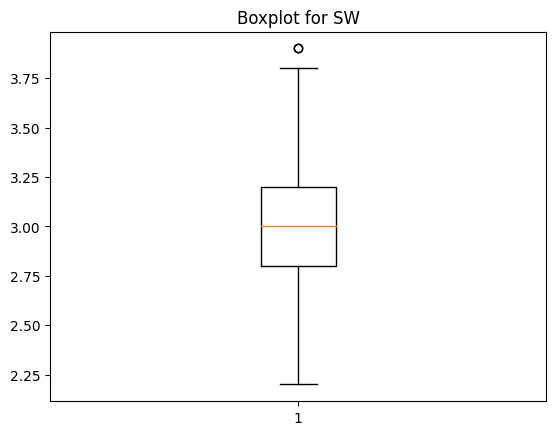

In [195]:
plt.boxplot(data['SW'])
plt.title('Boxplot for SW')

Text(0.5, 1.0, 'Boxplot for PL')

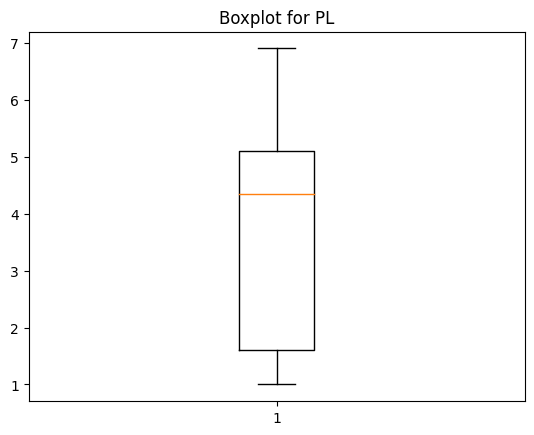

In [196]:
plt.boxplot(data['PL'])
plt.title('Boxplot for PL')

Text(0.5, 1.0, 'Boxplot for PW')

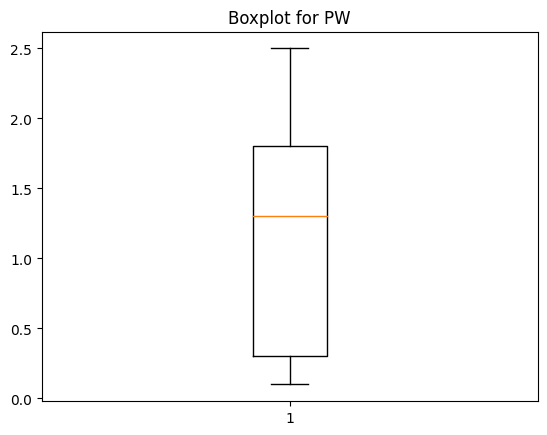

In [197]:
plt.boxplot(data['PW'])
plt.title('Boxplot for PW')

Label Encoding

In [198]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [199]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [200]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


**Q3.Classification**

Logistic Regression

We assign independent features to variable x and target feature to variable y

In [201]:
x=data.drop(['Classification'],axis=1)

In [202]:
y=data['Classification']

Next we split the data to testing and training.

In [203]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Next we create Logistic Regression model.

In [204]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = 'multinomial',solver ='lbfgs',max_iter = 1000)
model=lr.fit(x_train,y_train)

In [205]:
y_predictions=model.predict(x_test)

In [206]:
y_predictions

array([1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2])

Now lets predict confusion_matrix,accuracy_score,precision_score,recall_score and f1_score

In [207]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [208]:
confusion_matrix(y_test,y_predictions)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]])

In [209]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('Recall=',recall_score(y_test,y_predictions,average='weighted'))
print('f1 score=',f1_score(y_test,y_predictions,average='weighted'))

Accuracy= 0.9310344827586207
Precision= 0.9310344827586207
Recall= 0.9310344827586207
f1 score= 0.9310344827586207


KNN

In [210]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
metric_k=[]##create an empty list.
neighbors=np.arange(3,15)

Now lets create KNN model for k neighbors

In [212]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  classifier.fit(x_train,y_train)
  y_predictions=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_predictions)
  metric_k.append(acc)

In [213]:
metric_k

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

Lets plote a graph to find highest accuracy score of given k

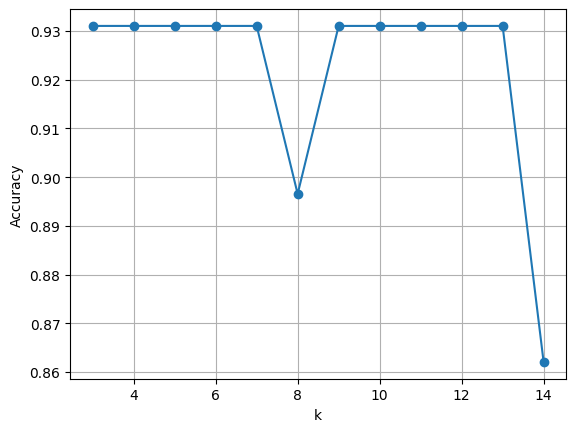

In [214]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

Now lets create a model for 13 neighbors

In [215]:
 classifier=KNeighborsClassifier(n_neighbors=13,metric='euclidean')
 classifier.fit(x_train,y_train)
 y_predictions=classifier.predict(x_test)

Now lets predict confusion_matrix,accuracy_score,precision_score,recall_score and f1_score.

In [216]:
print('Accuracy=',accuracy_score(y_test,y_predictions))
print('Precision=',precision_score(y_test,y_predictions,average='weighted'))
print('Recall=',recall_score(y_test,y_predictions,average='weighted'))
print('f1 score=',f1_score(y_test,y_predictions,average='weighted'))
print(confusion_matrix(y_test,y_predictions))

Accuracy= 0.9310344827586207
Precision= 0.9310344827586207
Recall= 0.9310344827586207
f1 score= 0.9310344827586207
[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


**SVM model**

First lets create SVM model.

In [217]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

Lets use this model to predict the following.

In [218]:
y_pred=svmclf.predict(x_test)

In [219]:
print('Accuracy=',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy= 0.896551724137931
[[9 0 0]
 [0 8 1]
 [0 2 9]]


**Decision Tree Classifier**

First lets create Decision Tree Classifier model.

In [220]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

Lets use this model to predict the following.

In [221]:
y_pred=dt_clf.predict(x_test)

In [222]:
print('Accuracy=',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy= 0.896551724137931
[[9 0 0]
 [0 8 1]
 [0 2 9]]


**Random Forest Classifier**

First lets create Random Forest Classifier model.

In [223]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

Lets use this model to predict the following.

In [224]:
y_pred=rf_clf.predict(x_test)

In [225]:
print('Accuracy=',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy= 0.9310344827586207
[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


Q3.Logistic Regression model,KNN model and Random Forest model get 0.93 accuracy score.So we can chose any of these 3 models.